In [1]:
import numpy as np
import numpy.random as npr

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
%matplotlib inline


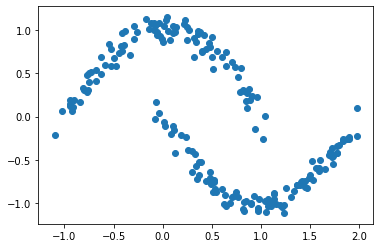

In [2]:
#DATA x
n1 = 100
x1 = np.linspace(-1,1,n1) + npr.randn(n1)*.1
y1 = 1-x1**2 + npr.randn(n1)*.1
n2 = 100
x2 = np.linspace(0,2,n2) + npr.randn(n2)*.1
y2 = (x2-1)**2-1 + npr.randn(n2)*.1
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
plt.scatter(x,y)
X = np.concatenate((x[:,None],y[:,None]),axis=1)

In [4]:
#method to plot cluster
def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));

### DBSCAN

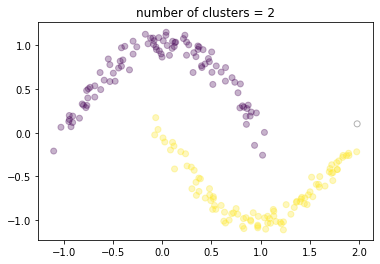

In [5]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

### Effect of the DBSCAN hyperparameters